In [1]:
!pip install openai
!pip install rpy2
!pip install google-cloud-secret-manager

In [2]:
from IPython import get_ipython
from IPython.display import Markdown, display

In [3]:
from google.cloud import secretmanager

def access_secret_version(resource_name):
    client = secretmanager.SecretManagerServiceClient()
    response = client.access_secret_version(request={"name": resource_name})
    return response.payload.data.decode("UTF-8")

# Your secret's resource name
resource_name = "projects/286751827882/secrets/openai_key/versions/1"

# Access the secret
openai_key = access_secret_version(resource_name)



In [4]:
from openai import OpenAI
client = OpenAI(api_key=openai_key)

In [5]:
def explain(cell_number):
    """Return the content of the specified cell number."""
    ipython = get_ipython()  # Get the current IPython instance
    
    # Ensure the cell number is valid
    if cell_number < len(ipython.user_ns['In']):
        response = client.chat.completions.create(
          model="gpt-4o-mini",
          messages=[
        {
            "role": "system",
            "content": "You are a helpful coding assitant providing advice to someone with limited coding experience. Please format your response in markdown "
        },
        {
          "role": "user",
          "content": "Please concisely comment this code to explain each line. Ignore the run cell magic and just focus on the R code " + ipython.user_ns['In'][cell_number]
        }
      ],
      temperature=1,
      max_tokens=2204,
      top_p=1,
      frequency_penalty=0,
      presence_penalty=0
        )

        #print(response.choices[0].message.content)
        return display(Markdown(response.choices[0].message.content))
        # Return the content of the cell
        #return ipython.user_ns['In'][cell_number]
    else:
        # Error message for invalid cell number
        return "Cell number out of range."
    

    
def modify(cell_number,modification):
    """Return the content of the specified cell number."""
    ipython = get_ipython()  # Get the current IPython instance
    
    # Ensure the cell number is valid
    if cell_number < len(ipython.user_ns['In']):
        response = client.chat.completions.create(
          model="gpt-4o-mini",
          messages=[
        {
            "role": "system",
            "content": "You are a helpful coding assitant. Please only provide R code "
        },
        {
          "role": "user",
          "content": "Please modify this R code " + ipython.user_ns['In'][cell_number] + " to accomplish " + modification + "Ignore the run cell magic and just focus on the R code. All of the tidyverse libraries are already loaded. You do not need to load any libraries. Return only code." 
        },
        {
          "role": "assistant",
          "content": "top_downregulated_genes <- gene %>% \n\t filter(logFC < 0) %>% \n\t arrange(desc(adj.P.Val)) %>% \n\t slice_head(n = 5) \n\n # View the results \n print(top_downregulated_genes)" 
        }      
      ],
      temperature=1,
      max_tokens=2204,
      top_p=1,
      frequency_penalty=0,
      presence_penalty=0
        )

        #print(response.choices[0].message.content)
        #return display(Markdown(response.choices[0].message.content))
        #return create_new_cell(response.choices[0].message.content)
        return create_new_cell("%%R\n\n" + response.choices[0].message.content)

        # Return the content of the cell
        #return ipython.user_ns['In'][cell_number]
    else:
        # Error message for invalid cell number
        return "Cell number out of range."

def propose(suggest):
        response = client.chat.completions.create(
          model="gpt-4o-mini",
          messages=[
        {
            "role": "system",
            "content": "You are a helpful coding assitant. Please only provide R code with no markdown"
        },
        {
          "role": "user",
          "content": "Please suggest R code to accomplish " + suggest + ".  If possible always suggest tidyverse code. All of the tidyverse libraries are already loaded. You do not need to load any libraries. Return only code, do not use markdown." 
        },
        {
          "role": "assistant",
          "content": "top_downregulated_genes <- gene %>% \n\t filter(logFC < 0) %>% \n\t arrange(desc(adj.P.Val)) %>% \n\t slice_head(n = 5) \n\n # View the results \n print(top_downregulated_genes)" 
        }      
      ],
      temperature=1,
      max_tokens=2204,
      top_p=1,
      frequency_penalty=0,
      presence_penalty=0
        )

        #print(response.choices[0].message.content)
        #return display(Markdown(response.choices[0].message.content))
        return create_new_cell("%%R\n\n" + response.choices[0].message.content)
    
def create_new_cell(contents):
    shell = get_ipython()
    shell.set_next_input(contents, replace=False)


In [9]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
%%R

install.packages("tidyverse")
install.packages("palmerpenguins")
install.packages("ggthemes")
library(tidyverse)

library(palmerpenguins)
library(ggthemes)

* installing *source* package ‘tidyverse’ ...
** package ‘tidyverse’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (tidyverse)
* installing *source* package ‘palmerpenguins’ ...
** package ‘palmerpenguins’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/var/tmp/RtmpPfdxkf/downloaded_packages’
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/palmerpenguins_0.1.1.tar.gz'
Content type 'application/x-gzip' length 2995960 bytes (2.9 MB)
downloaded 2.9 MB


The downloaded source packages are in
	‘/var/tmp/RtmpPfdxkf/downloaded_packages’
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/ggthemes_5.1.0.tar.gz'
Content type 'application/x-gzip' length 493992 bytes (482 KB)
downloaded 482 KB


The downloaded source packages are in
	‘/var/tmp/RtmpPfdxkf/downloaded_packages’
In addition: Warning message:
In (function (

In [12]:
%%R

gene<-read_tsv('limma-voom_luminalpregnant-luminallactate')


Rows: 15804 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): SYMBOL, GENENAME
dbl (6): ENTREZID, logFC, AveExpr, t, P.Value, adj.P.Val

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
%%R

top_upregulated_genes <- gene %>%
  filter(logFC > 0) %>%
  arrange(adj.P.Val) %>%
  slice_head(n = 10)

# View the results
print(top_upregulated_genes)

# A tibble: 10 × 8
   ENTREZID SYMBOL   GENENAME             logFC AveExpr     t  P.Value adj.P.Val
      <dbl> <chr>    <chr>                <dbl>   <dbl> <dbl>    <dbl>     <dbl>
 1    19659 Rbp1     retinol binding pro…  5.44    6.11  21.1 1.48e-11   2.36e-8
 2    19041 Ppl      periplakin            3.61    6.39  19.4 3.94e-11   3.99e-8
 3    72027 Slc39a4  solute carrier fami…  4.36    2.75  18.3 8.17e-11   6.79e-8
 4   217294 BC006965 cDNA sequence BC006…  3.73    4.19  16.4 2.98e-10   1.44e-7
 5    26897 Acot1    acyl-CoA thioestera…  3.52    5.67  16.4 6.99e-10   2.35e-7
 6    16790 Anpep    alanyl (membrane) a…  3.37    6.51  15.5 8.82e-10   2.73e-7
 7    71310 Tbc1d9   TBC1 domain family,…  2.24    6.30  13.8 2.49e- 9   5.90e-7
 8    20677 Sox4     SRY (sex determinin…  2.40    7.47  13.8 2.50e- 9   5.90e-7
 9    12739 Cldn3    claudin 3             2.26    5.19  13.5 3.05e- 9   6.78e-7
10   140474 Muc4     mucin 4               2.50    3.26  13.2 4.17e- 9   8.61e-7


In [14]:
explain(13)

Sure! Here's the R code with comments explaining each line:

```r
top_upregulated_genes <- gene %>%                  # Start with the 'gene' data frame and assign the result to 'top_upregulated_genes'
  filter(logFC > 0) %>%                             # Filter the rows where 'logFC' (log fold change) is greater than 0 (indicating upregulation)
  arrange(adj.P.Val) %>%                           # Arrange the filtered rows in ascending order based on 'adj.P.Val' (adjusted p-value)
  slice_head(n = 10)                                # Select the top 10 rows from the arranged data

# View the results
print(top_upregulated_genes)                        # Print the top upregulated genes to the console
``` 

This commented version explains the purpose of each step in the pipeline clearly.

In [19]:
propose("I need to find the 25 most signficantly upregulated genes from a dataframe called gene. \
Here are the column names: ENTREZID, SYMBOL, GENENAME, logFC AveExpr, t, P.Value, adj.P.Val")

In [20]:
%%R

top_upregulated_genes <- gene %>% 
  filter(logFC > 0) %>% 
  arrange(adj.P.Val) %>% 
  slice_head(n = 25) 

print(top_upregulated_genes)

# A tibble: 25 × 8
   ENTREZID SYMBOL   GENENAME             logFC AveExpr     t  P.Value adj.P.Val
      <dbl> <chr>    <chr>                <dbl>   <dbl> <dbl>    <dbl>     <dbl>
 1    19659 Rbp1     retinol binding pro…  5.44    6.11  21.1 1.48e-11   2.36e-8
 2    19041 Ppl      periplakin            3.61    6.39  19.4 3.94e-11   3.99e-8
 3    72027 Slc39a4  solute carrier fami…  4.36    2.75  18.3 8.17e-11   6.79e-8
 4   217294 BC006965 cDNA sequence BC006…  3.73    4.19  16.4 2.98e-10   1.44e-7
 5    26897 Acot1    acyl-CoA thioestera…  3.52    5.67  16.4 6.99e-10   2.35e-7
 6    16790 Anpep    alanyl (membrane) a…  3.37    6.51  15.5 8.82e-10   2.73e-7
 7    71310 Tbc1d9   TBC1 domain family,…  2.24    6.30  13.8 2.49e- 9   5.90e-7
 8    20677 Sox4     SRY (sex determinin…  2.40    7.47  13.8 2.50e- 9   5.90e-7
 9    12739 Cldn3    claudin 3             2.26    5.19  13.5 3.05e- 9   6.78e-7
10   140474 Muc4     mucin 4               2.50    3.26  13.2 4.17e- 9   8.61e-7
# ℹ 15 mo

In [18]:
%%R

top_upregulated_genes <- gene %>% 
  arrange(desc(logFC)) %>% 
  slice_head(n = 25) 

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values (`geom_point()`). 



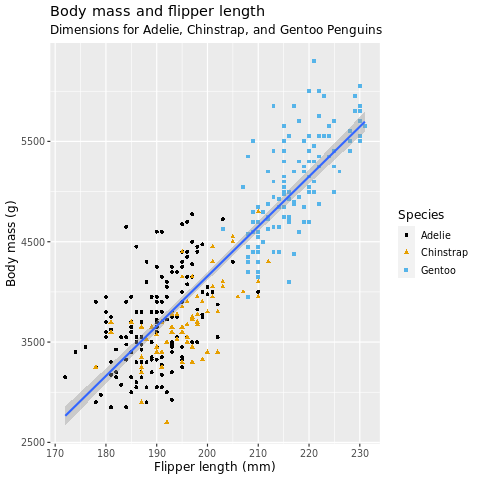

In [15]:
%%R

ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(aes(color = species, shape = species)) +
  geom_smooth(method = "lm") +
  labs(
    title = "Body mass and flipper length",
    subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo Penguins",
    x = "Flipper length (mm)", y = "Body mass (g)",
    color = "Species", shape = "Species"
  ) +
  scale_color_colorblind() +
  theme_gray(base_size = 12)

In [16]:
explain(15)

Sure! Here's a concise commentary on each line of the R code:

```r
ggplot(                                   # Initialize a ggplot object with the specified data
  data = penguins,                       # Set the data source to the 'penguins' dataset
  mapping = aes(x = flipper_length_mm,   # Map flipper length to x-axis
                y = body_mass_g)         # Map body mass to y-axis
) +
  geom_point(aes(color = species,         # Add scatter plot points colored and shaped by species
                 shape = species)) +
  geom_smooth(method = "lm")              # Add a linear regression line to the plot
  labs(                                   # Add labels to the plot
    title = "Body mass and flipper length",  # Main title of the plot
    subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo Penguins",  # Subtitle for context
    x = "Flipper length (mm)",            # Label for the x-axis
    y = "Body mass (g)",                  # Label for the y-axis
    color = "Species",                    # Label for the legend indicating color represents species
    shape = "Species"                     # Label for the legend indicating shape represents species
  ) +
  scale_color_colorblind()                # Adjust color scale to be colorblind-friendly
  theme_gray(base_size = 12)              # Set a gray theme with a base font size of 12
```

This annotated code explanation should help clarify the intentions behind each line of the R code. Let me know if you have any further questions!

In [25]:
modify(15,"remove gentoo penguins from the graph as they are my least favorite penguin")

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 1 rows containing missing values (`geom_point()`). 



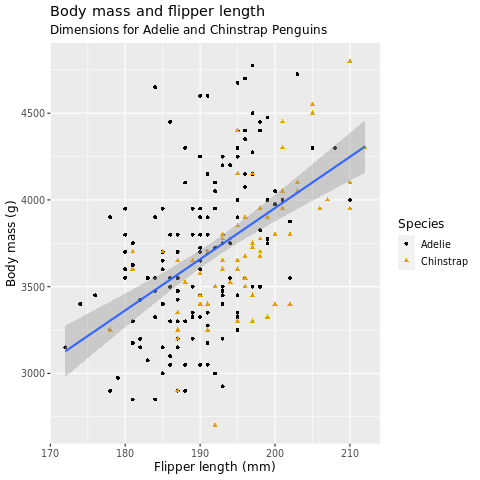

In [26]:
%%R


ggplot(
  data = penguins %>% filter(species != "Gentoo"),
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(aes(color = species, shape = species)) +
  geom_smooth(method = "lm") +
  labs(
    title = "Body mass and flipper length",
    subtitle = "Dimensions for Adelie and Chinstrap Penguins",
    x = "Flipper length (mm)", 
    y = "Body mass (g)",
    color = "Species", 
    shape = "Species"
  ) +
  scale_color_colorblind() +
  theme_gray(base_size = 12)
